# Implementacion Perceptron Regresivo en Python
Para esto, resolveremos el caso Ecommerce adaptando nuestro perceptrón de clasificación para que resuelva un problema de regresión

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Ecommerce.csv')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Formulación del Modelo

In [4]:
df['Yearly Amount Spent'].describe()

count    500.000000
mean     499.314038
std       79.314782
min      256.670582
25%      445.038277
50%      498.887875
75%      549.313828
max      765.518462
Name: Yearly Amount Spent, dtype: float64

In [5]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [6]:
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership',]].values
y = df['Yearly Amount Spent'].values

### Implementación Perceptrón

In [7]:
# Define una función que calcule el producto punto entre dos vectores:
def dot_product(x, w):
    return np.dot(x,w)

In [8]:
# Define la función de activación.
def activation(x):
    # en este caso será la función lineal
    return x

In [10]:
# Define la función de entrenamiento del perceptrón:
def perceptron_train(X, y, num_epochs, learning_rate):

  # inicalizar pesos de forma aleatoria
  weights = np.random.rand( X.shape[1] )

  # acá dejaremos el error que hubo en cada iteración
  errors = []

  # iterar las epocas
  for epochs in range(num_epochs):

    epoch_error = 0

    # itera sobre todos los elementos del set de entrenamiento
    for i in range(X.shape[0]):

      # calcular la salida del perceptron
      output = activation( dot_product(X[i], weights) )

      #  contabilizar el error
      if output != y[i]:
        # definimos la siguiente metrica de error
        error = y[i]- output
        # actualizamos los pesos si la salida es incorrecta
        weights = weights + learning_rate * error * X[i]
        epoch_error = epoch_error + error**2

    mse = epoch_error/X.shape[0]
    errors.append(mse)

  return weights, errors

In [11]:
weights, errors = perceptron_train(X, y, num_epochs=30, learning_rate=0.0001)

In [12]:
weights

array([11.08011712, 27.63193011, -9.72362478, 48.01700109])

## Haciendo Predicciones

In [13]:
def perceptron_predict(x, weights):
    return activation(dot_product(x,weights))

In [14]:
x = np.array([34.497268, 12.655651, 39.577668, 4.082621])
prediction = perceptron_predict(x,weights)
print(prediction)

543.1306576523878


## Evaluando el desempeño

In [15]:
y_pred = [perceptron_predict(x,weights) for x in X]

In [18]:
from sklearn.metrics import r2_score

In [19]:
r2_score(y, y_pred)

0.8688748382101947

### Error por epochs

Text(0, 0.5, 'Error')

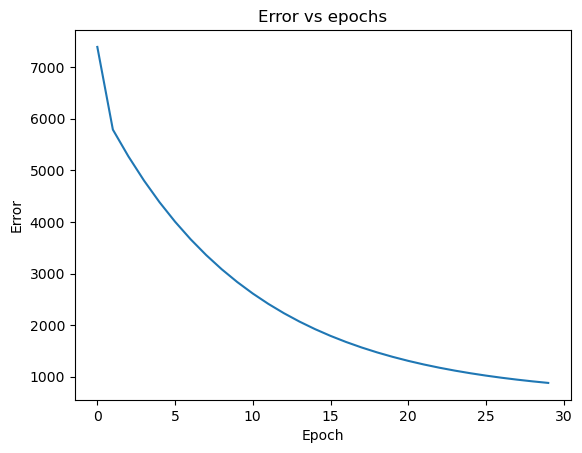

In [21]:
plt.plot(errors, label='error')
plt.title('Error vs epochs')
plt.xlabel('Epoch')
plt.ylabel('Error')